In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#initial Values

iter = 10000
EPS = 0.1
banditProb = [0.2,0.5,0.75]

In [14]:
class Casino:
    def __init__(self,p) :
        self.p = p
        self.p_estimate = 5
        self.N = 0.


    def pull(self):
        return np.random.random() < self.p

    def update(self,x):
        self.N += 1
        self.p_estimate = self.p_estimate + (x- self.p_estimate) / self.N

In [15]:
def experiment():
    casinos = [Casino(p) for p in banditProb]

    rewards = np.zeros(iter)
    explored = 0
    exploit = 0
    optimal = 0

    optimal_j = np.argmax([b.p for b in casinos])
    print("optimal j:",optimal_j)

    for i in range(iter):


        j = np.argmax([b.p_estimate for b in casinos])

        if j == optimal_j:
            optimal += 1

        x = casinos[j].pull()

        rewards[i] = x
        casinos[j].update(x)

    for c in casinos:
        print("mean estimate (",c.p,"):",c.p_estimate)
        

    print("total rewards :", rewards.sum())

    print("win rate :", rewards.sum()/iter)

    print("Num of times each casino selected :",[b.N for b in casinos])

    #plot result
    cum_reward = np.cumsum(rewards)
    win_rate = cum_reward / (np.arange(iter)+1)

    plt.plot(win_rate)
    plt.plot(np.ones(iter)*np.max(banditProb))
    plt.show()

optimal j: 2
mean estimate ( 0.2 ): 0.0
mean estimate ( 0.5 ): 0.5
mean estimate ( 0.75 ): 0.7428228468540548
total rewards : 7427.0
win rate : 0.7427
Num of times each casino selected : [1.0, 2.0, 9997.0]


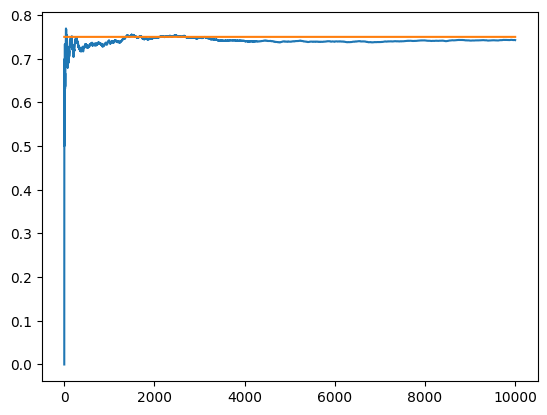

In [16]:

if __name__ == "__main__":
    experiment()
